### CatBoost modeling - Regression (예측)

In [1]:
# 필요한 기본 package 불러오기
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib

from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import time
import warnings
warnings.filterwarnings('ignore')

In [2]:
!git clone https://github.com/yun-seon/DX-Training-LGES-0630.git

Cloning into 'DX-Training-LGES-0630'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (21/21), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 89 (delta 7), reused 0 (delta 0), pack-reused 68
Unpacking objects: 100% (89/89), done.


#### (1) 발전소 전기 에너지 출력(PE) 예측 문제

In [3]:
'''
CCPP Data : 6년 간(2006-2011) 발전소가 최대 부하로 작동할 때 시간당 순수 전기 에너지 출력(PE)를
평균 주변 온도(AT), 주변 압력(AP), 상대 습도(RH), 배기 진공(V) 센서 데이터를 이용해 예측하는 데이터
'''
# 데이터 불러오기
csv = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_CCPP.csv", encoding = "UTF-8-sig")
csv.head(10)

,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90
5,26.27,59.44,1012.23,58.77,443.67
6,15.89,43.96,1014.02,75.24,467.35
7,9.48,44.71,1019.12,66.43,478.42
8,14.64,45.00,1021.78,41.25,475.98
9,11.74,43.56,1015.14,70.72,477.50


In [4]:
# 전처리한 데이터 불러오기
# 학습 데이터와 테스트 데이터 구분

#학습 데이터 비율: 0.7, 테스트 데이터 비율: 0.3
train_data, test_data = train_test_split(csv, train_size = 0.7)

#독립변수(Xs)와 종속변수(Y) 구분
train_X = train_data.iloc[:, :-1].reset_index(drop = True) # train_X에 종속변수 제거
train_Y = train_data.iloc[:, -1].reset_index(drop = True) # train_Y(종속변수) 따로 저장

test_X = test_data.iloc[:, :-1].reset_index(drop = True) # test_X에 종속변수 제거
test_Y = test_data.iloc[:, -1].reset_index(drop = True) # test_Y(종속변수) 따로 저장

train_X.head(10)

,AT,V,AP,RH
0,5.43,39.90,1007.50,86.27
1,23.66,72.43,1008.00,89.49
2,21.40,74.93,1014.58,80.85
3,18.26,60.95,1016.94,78.91
4,14.87,42.18,1015.23,74.41
5,32.82,68.31,1010.44,41.85
6,26.16,59.87,1013.24,71.92
7,7.00,41.55,1001.43,97.12
8,22.18,62.91,1012.14,68.86
9,9.12,41.54,1018.61,79.26


In [7]:
'''
설치하기 : https://catboost.ai/docs/concepts/python-installation.html

로컬 PC에서 설치 시, 아래의 Code 사용
conda config --add channels conda-forge
conda install catboost
'''
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 75 kB/s 


In [8]:
'''
파라미터 목록 : https://catboost.ai/docs/concepts/python-reference_parameters-list.html
'''
# CatBoost 모델(예측) package 불러오기
from catboost import CatBoostRegressor

#CatBoost 모델 생성하기
model = CatBoostRegressor(objective = 'RMSE',
                          iterations= 100,
                          learning_rate = 0.1,
                          max_depth = 6,
                          num_leaves = 31,
                          colsample_bylevel = 0.7,
                          verbose=True)

#모델에 데이터 fitting (학습)
model.fit(train_X, train_Y)

0:	learn: 15.5797515	total: 50ms	remaining: 4.95s
1:	learn: 14.2147931	total: 63.3ms	remaining: 3.1s
2:	learn: 13.0261838	total: 70.9ms	remaining: 2.29s
3:	learn: 11.9481600	total: 79.3ms	remaining: 1.9s
4:	learn: 10.9976073	total: 86.4ms	remaining: 1.64s
5:	learn: 10.1679470	total: 103ms	remaining: 1.61s
6:	learn: 9.3912019	total: 109ms	remaining: 1.44s
7:	learn: 8.7333948	total: 113ms	remaining: 1.3s
8:	learn: 8.1190339	total: 116ms	remaining: 1.17s
9:	learn: 7.5928310	total: 122ms	remaining: 1.09s
10:	learn: 7.1141819	total: 126ms	remaining: 1.02s
11:	learn: 6.6995783	total: 134ms	remaining: 982ms
12:	learn: 6.3371299	total: 141ms	remaining: 944ms
13:	learn: 6.0176882	total: 148ms	remaining: 911ms
14:	learn: 5.7991799	total: 152ms	remaining: 860ms
15:	learn: 5.5546157	total: 158ms	remaining: 830ms
16:	learn: 5.3568120	total: 163ms	remaining: 794ms
17:	learn: 5.1846695	total: 175ms	remaining: 797ms
18:	learn: 5.0399632	total: 179ms	remaining: 762ms
19:	learn: 4.8949314	total: 194ms	r

In [9]:
# 학습한 CatBoost 모델을 통해 테스트 데이터 예측하기

# pred 변수에 실제값 추가
pred = pd.DataFrame(test_Y)

# 생성된 모델로 예측하기 / pred 변수에 예측값 추가
pred["pred"] = model.predict(test_X)

pred.head(10)

,PE,pred
0,432.56,431.704930
1,437.87,441.167004
2,436.32,432.422047
3,459.95,460.654958
4,470.17,474.836807
5,473.00,469.903565
6,450.22,448.726781
7,436.74,441.931686
8,467.68,466.585183
9,466.15,464.164752


MAE :  3.0036932207630724
MSE :  15.599157475457398


Text(0, 0.5, 'pred')

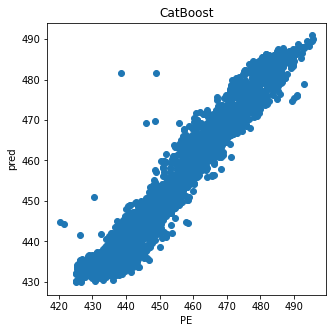

In [10]:
# 예측 값과 실제 값 간의 차이(오차) 계산

# Mean Absolute Error (MAE)
MAE = np.abs(pred.PE - pred.pred).mean()
print("MAE : ", MAE)

# Mean Squared Error (MSE)
MSE = np.power(pred.PE - pred.pred, 2).mean()
print("MSE : ", MSE)

# 오차 Plot
plt.figure(figsize = (5, 5))
plt.title("CatBoost")
plt.scatter(pred.PE, pred.pred)
plt.xlabel("PE")
plt.ylabel("pred")

#### (2) 터키 북서부 가스 터빈의 가스 방출량 예측

In [11]:
'''
pp_gas_emission dataset : 터키 북서부 지역에 위치한 가스 터빈에서 시간당 1시간동안 집계된 11개 센서, 36733개 instance가 5년치로 나누어져 있음 (날짜는 제공되지 않지만 시간순서로 정렬되어있음)

타겟명은 'TEY'(Turbine energy yield, 터빈 에너지 생산량)이고, 주변 온도(AT), 주변 압력(AP), 주변 습도 (AH), 에어 필터 차압 (AFDP),

가스 터빈 배기 압력 (GTEP), 터빈 입구 온도 (TIT), 터빈 후 온도 (TAT), 압축기 토출 압력 (CDP), 일산화탄소 (CO), 질소 산화물 (NOx)의 10개의 센서 데이터를 이용해 TEY 예측하는 데이터셋
'''

# 데이터셋 불러오기 / 데이터 shape 확인
gt_df1 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2011.csv")
gt_df2 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2012.csv")
gt_df3 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2013.csv")
gt_df4 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2014.csv")
gt_df5 = pd.read_csv("/content/DX-Training-LGES-0630/Data/Data_GBM_gt_2015.csv")
print('dataset shape:', gt_df1.shape)
print('dataset shape:', gt_df2.shape)
print('dataset shape:', gt_df3.shape)
print('dataset shape:', gt_df4.shape)
print('dataset shape:', gt_df5.shape)

dataset shape: (7411, 11)
dataset shape: (7628, 11)
dataset shape: (7152, 11)
dataset shape: (7158, 11)
dataset shape: (7384, 11)


In [12]:
# 전체 데이터 위/아래로 병합 (concatenate)

gt_df = pd.concat([gt_df1, gt_df2, gt_df3, gt_df4, gt_df5], axis=0)
gt_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36733 entries, 0 to 7383
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      36733 non-null  float64
 1   AP      36733 non-null  float64
 2   AH      36733 non-null  float64
 3   AFDP    36733 non-null  float64
 4   GTEP    36733 non-null  float64
 5   TIT     36733 non-null  float64
 6   TAT     36733 non-null  float64
 7   TEY     36733 non-null  float64
 8   CDP     36733 non-null  float64
 9   CO      36733 non-null  float64
 10  NOX     36733 non-null  float64
dtypes: float64(11)
memory usage: 3.4 MB


In [13]:
# 독립변수(Xs)와 종속변수(Y, 'TEY') 구분
y_labels = gt_df.iloc[:, 7:8].reset_index(drop=True) # y_labels에 종속변수 저장
X_features = gt_df.drop(['TEY'], axis=1).reset_index(drop=True) # X_features에 독립변수 저장

In [14]:
# 학습 데이터와 테스트 데이터 구분
# 학습 데이터 비율: 0.6, 테스트 데이터 비율: 0.4
X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels, test_size=0.4, random_state=0)

In [15]:
from catboost import CatBoostRegressor
from catboost import Pool

# feature와 target 변수를 train & test dataset으로 합하여 data frame 재구성
train_dataset = Pool(X_train, y_train)
test_dataset = Pool(X_test, y_test)

In [16]:
# 파라미터 설정 및 모델 생성
cat_reg = CatBoostRegressor(loss_function='RMSE')

In [17]:
# Grid Search를 수행할 iterations, learning_rate, depth, l2_leaf_reg를 입력
grid = {'iterations': [100, 150, 200],
        'learning_rate': [0.03, 0.1],
        'depth': [2, 4, 6, 8],
        'l2_leaf_reg': [0.2, 0.5, 1, 3]}

# 주어진 parameter로 train dataset으로 grid search 수행
cat_reg.grid_search(grid, train_dataset)

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
156:	learn: 1.8298161	test: 1.8946976	best: 1.8946976 (156)	total: 1.05s	remaining: 289ms
157:	learn: 1.8029108	test: 1.8679166	best: 1.8679166 (157)	total: 1.06s	remaining: 282ms
158:	learn: 1.7785301	test: 1.8432989	best: 1.8432989 (158)	total: 1.07s	remaining: 275ms
159:	learn: 1.7550627	test: 1.8205228	best: 1.8205228 (159)	total: 1.07s	remaining: 268ms
160:	learn: 1.7314239	test: 1.7969918	best: 1.7969918 (160)	total: 1.08s	remaining: 261ms
161:	learn: 1.7090626	test: 1.7747281	best: 1.7747281 (161)	total: 1.08s	remaining: 254ms
162:	learn: 1.6878303	test: 1.7536802	best: 1.7536802 (162)	total: 1.09s	remaining: 247ms
163:	learn: 1.6675118	test: 1.7329360	best: 1.7329360 (163)	total: 1.09s	remaining: 240ms
164:	learn: 1.6474311	test: 1.7129759	best: 1.7129759 (164)	total: 1.1s	remaining: 234ms
165:	learn: 1.6281678	test: 1.6935439	best: 1.6935439 (165)	total: 1.11s	remaining: 227ms
166:	learn: 1.6101081	test: 1.6757377	best: 1.6757377 (166)	total

{'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               45,
               46,
               47,
               48,
               49,
             

In [18]:
# 최적의 파라미터로 모델 설정 후 fitting(학습) 진행
cat_reg = CatBoostRegressor(
    iterations=200, learning_rate=0.1, l2_leaf_reg=0.2, depth=8, loss_function='RMSE')

cat_reg.fit(train_dataset)

0:	learn: 14.1212595	total: 14ms	remaining: 2.79s
1:	learn: 12.7758464	total: 28.1ms	remaining: 2.79s
2:	learn: 11.5937074	total: 41.8ms	remaining: 2.74s
3:	learn: 10.4990875	total: 55.7ms	remaining: 2.73s
4:	learn: 9.5258386	total: 69.2ms	remaining: 2.7s
5:	learn: 8.6457863	total: 83ms	remaining: 2.68s
6:	learn: 7.8525680	total: 97ms	remaining: 2.67s
7:	learn: 7.1350819	total: 111ms	remaining: 2.65s
8:	learn: 6.4826947	total: 124ms	remaining: 2.64s
9:	learn: 5.8936680	total: 138ms	remaining: 2.63s
10:	learn: 5.3791631	total: 152ms	remaining: 2.61s
11:	learn: 4.9052764	total: 169ms	remaining: 2.64s
12:	learn: 4.4818627	total: 183ms	remaining: 2.63s
13:	learn: 4.1004286	total: 196ms	remaining: 2.6s
14:	learn: 3.7654084	total: 215ms	remaining: 2.65s
15:	learn: 3.4523578	total: 234ms	remaining: 2.69s
16:	learn: 3.1801608	total: 248ms	remaining: 2.66s
17:	learn: 2.9320717	total: 261ms	remaining: 2.63s
18:	learn: 2.7059433	total: 274ms	remaining: 2.61s
19:	learn: 2.5064041	total: 287ms	rema

In [19]:
# 학습 완료된 CatBoost 모델을 통해 테스트 데이터 예측
cat_pred = cat_reg.predict(X_test)

# 예측 값과 실제 값 간의 차이(오차) 계산
# Mean Abolute Error (MAE)
cat_mae = mean_absolute_error(y_test, cat_pred)

# Mean Squared Error (MSE)
cat_mse = mean_squared_error(y_test, cat_pred)

# Root Mean Squared Error (RMSE)
cat_rmse = (np.sqrt(mean_squared_error(y_test, cat_pred)))

# 예측값과 실제 값 간의 R^2(결정 계수) 계산
# 분산 기반으로 예측 성능을 평가 / 실제 값의 분산 대비 예측값의 분산 비율을 지표로 하며, 1에 가까울수록 예측 정확도가 높음
cat_r2 = r2_score(y_test, cat_pred)

print("Testing performance")
print('cat_MAE: {:.4f}'.format(cat_mae))
print('cat_MSE: {:.4f}'.format(cat_mse))
print('cat_RMSE: {:.4f}'.format(cat_rmse))
print('cat_R2: {:.4f}'.format(cat_r2))

Testing performance
cat_MAE: 0.5255
cat_MSE: 0.4829
cat_RMSE: 0.6949
cat_R2: 0.9980


In [20]:
sorted_feature_importance = cat_reg.feature_importances_.argsort()
sorted_feature_importance

array([1, 3, 2, 8, 9, 6, 0, 5, 4, 7])

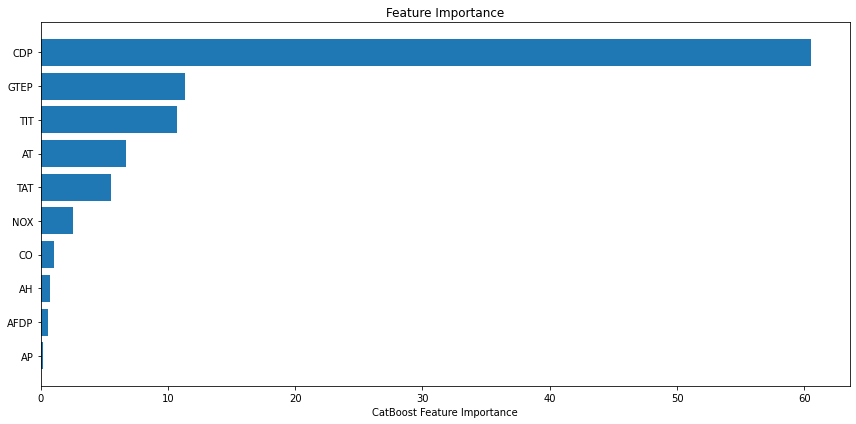

In [21]:
# feature importance 산출 / 값이 높을수록 해당 피처의 피처 중요도가 높다고 해석할 수 있음
# feature_importance를 높은 순서로 정렬
sorted_feature_importance = cat_reg.feature_importances_.argsort()

fig, ax = plt.subplots(figsize=(12, 6))
plt.barh(X_train.columns[sorted_feature_importance],
         cat_reg.feature_importances_[sorted_feature_importance])
plt.title('Feature Importance')
plt.xlabel("CatBoost Feature Importance")
fig.tight_layout()
plt.show()